# Steel Industry Energy Consumption

The data is collected from a smart small-scale steel industry in South Korea.

Dataset Characteristics
Multivariate

Associated Tasks
Regression

Feature Type
Real, Categorical

Instances
35040

Features
9
Additional Variable Information

Data Variables Type Measurement
Industry Energy Consumption Continuous kWh
Lagging Current reactive power Continuous kVarh
Leading Current reactive power Continuous kVarh
tCO2(CO2) Continuous ppm
Lagging Current power factor Continuous %
Leading Current Power factor Continuous %
Number of Seconds from midnight Continuous S
Week status Categorical (Weekend (0) or a Weekday(1))
Day of week Categorical Sunday, Monday â€¦. Saturday
Load Type Categorical Light Load, Medium Load, Maximum Load

Class Labels

Light Load, Medium Load, Maximum Load

Dataset Information
Additional Information
The information gathered is from the DAEWOO Steel Co. Ltd in Gwangyang, South Korea. It produces several types of coils, steel plates, and iron plates. The information on electricity consumption is held in a cloud-based system. The information on energy consumption of the industry is stored on the website of the Korea Electric Power Corporation (pccs.kepco.go.kr), and the perspectives on daily, monthly, and annual data are calculated and shown.

Introductory Paper
Efficient energy consumption prediction model for a data analytic-enabled industry building in a smart city
By Sathishkumar V E, Changsun Shin, Yongyun Cho. 2021

Published in Building Research & Information, Vol. 49. no. 1, pp. 127-143
Data set link= https://archive.ics.uci.edu/dataset/851/steel+industry+energy+consumption

In [49]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import joblib
import shap
import statsmodels.api as sm
sns.set(style="whitegrid", palette="muted", context="notebook")
pd.options.display.max_columns = 200

importing libraries to sets up the envionment

In [50]:
df = pd.read_csv(r"C:\Users\Ramandeep\Documents\Downloads\Steel_industry_data.csv")

In [51]:
# Quick overview
display(df.info())
display(df.describe().T)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35040 entries, 0 to 35039
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   date                                  35040 non-null  object 
 1   Usage_kWh                             35040 non-null  float64
 2   Lagging_Current_Reactive.Power_kVarh  35040 non-null  float64
 3   Leading_Current_Reactive_Power_kVarh  35040 non-null  float64
 4   CO2(tCO2)                             35040 non-null  float64
 5   Lagging_Current_Power_Factor          35040 non-null  float64
 6   Leading_Current_Power_Factor          35040 non-null  float64
 7   NSM                                   35040 non-null  int64  
 8   WeekStatus                            35040 non-null  object 
 9   Day_of_week                           35040 non-null  object 
 10  Load_Type                             35040 non-null  object 
dtypes: float64(6), 

None

,count,mean,std,min,25%,50%,75%,max
Usage_kWh,35040.0,27.386892,33.444380,0.0,3.20,4.57,51.2375,157.18
Lagging_Current_Reactive.Power_kVarh,35040.0,13.035384,16.306000,0.0,2.30,5.00,22.6400,96.91
Leading_Current_Reactive_Power_kVarh,35040.0,3.870949,7.424463,0.0,0.00,0.00,2.0900,27.76
CO2(tCO2),35040.0,0.011524,0.016151,0.0,0.00,0.00,0.0200,0.07
Lagging_Current_Power_Factor,35040.0,80.578056,18.921322,0.0,63.32,87.96,99.0225,100.00
Leading_Current_Power_Factor,35040.0,84.367870,30.456535,0.0,99.70,100.00,100.0000,100.00
NSM,35040.0,42750.000000,24940.534317,0.0,21375.00,42750.00,64125.0000,85500.00


In [52]:
# Check missing values and duplicates
print("Missing values per column:\n", df.isna().sum())
print("Duplicate rows:", df.duplicated().sum())
df

Missing values per column:
 date                                    0
Usage_kWh                               0
Lagging_Current_Reactive.Power_kVarh    0
Leading_Current_Reactive_Power_kVarh    0
CO2(tCO2)                               0
Lagging_Current_Power_Factor            0
Leading_Current_Power_Factor            0
NSM                                     0
WeekStatus                              0
Day_of_week                             0
Load_Type                               0
dtype: int64
Duplicate rows: 0


,date,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type
0,01/01/2018 00:15,3.17,2.95,0.00,0.0,73.21,100.00,900,Weekday,Monday,Light_Load
1,01/01/2018 00:30,4.00,4.46,0.00,0.0,66.77,100.00,1800,Weekday,Monday,Light_Load
2,01/01/2018 00:45,3.24,3.28,0.00,0.0,70.28,100.00,2700,Weekday,Monday,Light_Load
3,01/01/2018 01:00,3.31,3.56,0.00,0.0,68.09,100.00,3600,Weekday,Monday,Light_Load
4,01/01/2018 01:15,3.82,4.50,0.00,0.0,64.72,100.00,4500,Weekday,Monday,Light_Load
...,...,...,...,...,...,...,...,...,...,...,...
35035,31/12/2018 23:00,3.85,4.86,0.00,0.0,62.10,100.00,82800,Weekday,Monday,Light_Load
35036,31/12/2018 23:15,3.74,3.74,0.00,0.0,70.71,100.00,83700,Weekday,Monday,Light_Load
35037,31/12/2018 23:30,3.78,3.17,0.07,0.0,76.62,99.98,84600,Weekday,Monday,Light_Load
35038,31/12/2018 23:45,3.78,3.06,0.11,0.0,77.72,99.96,85500,Weekday,Monday,Light_Load


- Basic inspection
- df.head(), df.info(), df.describe().
- Understand structure, missing values, datatypes.


In [53]:
# Convert date column to datetime
df['date'] = pd.to_datetime(df['date'], dayfirst=True)

In [54]:
from datetime import datetime
from sklearn.model_selection import train_test_split, TimeSeriesSplit, RandomizedSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder, RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.inspection import permutation_importance, PartialDependenceDisplay

In [55]:
#Create datetime features
df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df['hour'] = df['date'].dt.hour
df['minute'] = df['date'].dt.minute
df['second'] = df['date'].dt.second
df['dayofweek'] = df['date'].dt.dayofweek  # Monday=0
df['is_weekend'] = df['dayofweek'].isin([5,6]).astype(int)

# Cyclic encode hour (useful for time features)
df['hour_sin'] = np.sin(2 * np.pi * df['hour'] / 24)
df['hour_cos'] = np.cos(2 * np.pi * df['hour'] / 24)

display(df[['date','year','month','day','hour','dayofweek','is_weekend','hour_sin','hour_cos']].head())

,date,year,month,day,hour,dayofweek,is_weekend,hour_sin,hour_cos
0,2018-01-01 00:15:00,2018,1,1,0,0,0,0.000000,1.000000
1,2018-01-01 00:30:00,2018,1,1,0,0,0,0.000000,1.000000
2,2018-01-01 00:45:00,2018,1,1,0,0,0,0.000000,1.000000
3,2018-01-01 01:00:00,2018,1,1,1,0,0,0.258819,0.965926
4,2018-01-01 01:15:00,2018,1,1,1,0,0,0.258819,0.965926


preprossing of the time series data 

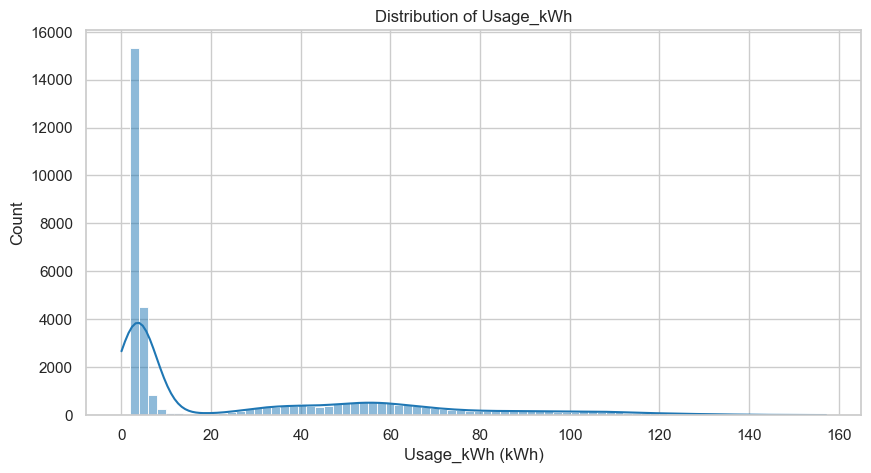

In [56]:
#Target distribution
plt.figure(figsize=(10,5))
sns.histplot(df['Usage_kWh'], bins=80, kde=True, color='tab:blue')
plt.title('Distribution of Usage_kWh')
plt.xlabel('Usage_kWh (kWh)')
plt.show()

- Right-Skewed Distribution: The data is heavily skewed to the right, meaning most of the time consume low amounts of electricity, while a few time consume much more.
- Peak Usage Range: The highest concentration of data points falls between 2 to 4 kWh, indicating this is the most common daily usage range.

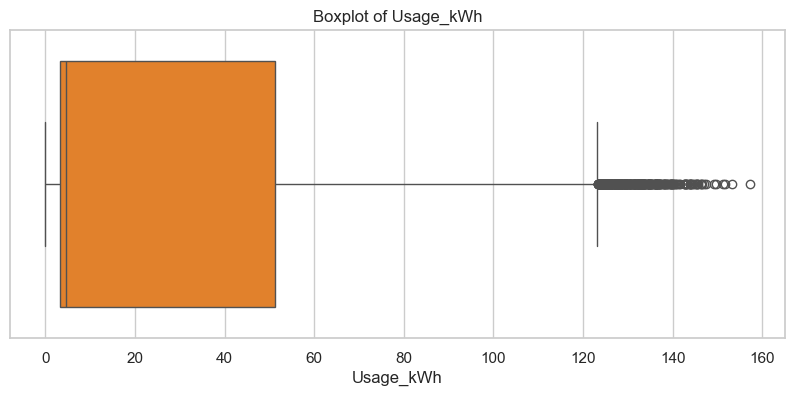

In [57]:
plt.figure(figsize=(10,4))
sns.boxplot(x=df['Usage_kWh'], color='tab:orange')
plt.title('Boxplot of Usage_kWh')
plt.show()

- **Right-Skewed Distribution**:  
  The median is closer to the lower end of the box, and the upper whisker extends far beyond the interquartile range. This indicates that most observations have relatively low usage, but a few records show extremely high consumption.

- **Presence of Outliers**:  
  Numerous data points lie beyond the upper whisker (above ~120 kWh), reaching up to ~160 kWh. These are high-usage outliers, possibly due to peak industrial activity or anomalies in measurement.

- **Large Interquartile Range (IQR)**:  
  The central box spans from approximately 0 to 50 kWh, showing high variability in typical usage. This suggests the need for robust preprocessing techniques that can handle wide distributions.

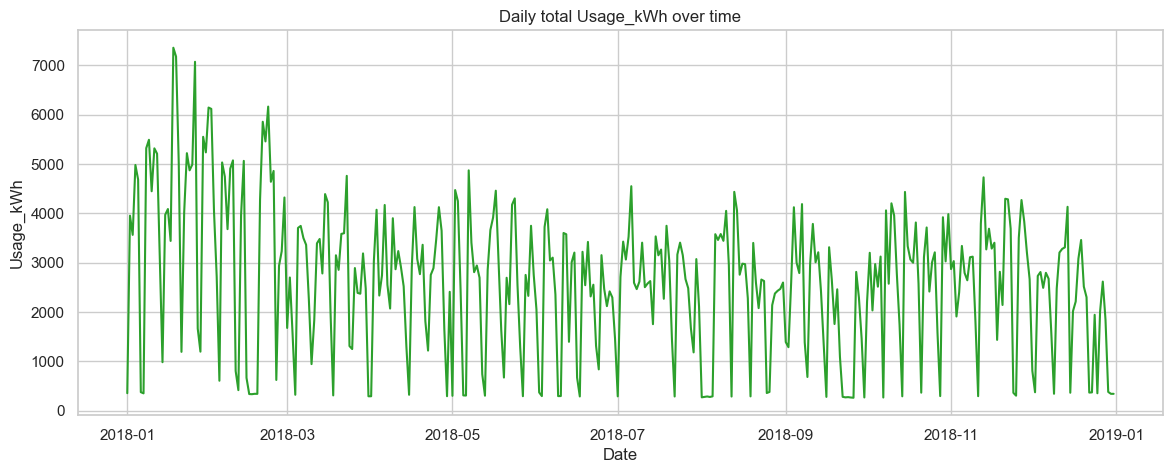

In [58]:
#Time series overview (aggregate by day if data is high frequency)
df_daily = df.set_index('date').resample('D')['Usage_kWh'].sum().reset_index()
plt.figure(figsize=(14,5))
plt.plot(df_daily['date'], df_daily['Usage_kWh'], color='tab:green')
plt.title('Daily total Usage_kWh over time')
plt.xlabel('Date')
plt.ylabel('Usage_kWh')
plt.show()

This line plot visualizes the daily electricity consumption (`Usage_kWh`) from January 2018 to January 2019. It provides several key insights into the temporal behavior of energy usage:

- **High Variability**:  
  The daily usage fluctuates significantly throughout the year, indicating dynamic operational patterns in the steel industry.

- **Seasonal Trends**:  
  Certain periods show sustained increases or decreases in usage, suggesting possible seasonal effects or production cycles.

- **Peak Consumption Events**:  
  There are multiple spikes where usage exceeds 7000 kWh, which may correspond to high-demand days, special operations, or anomalies worth investigating.

- **Baseline Shifts**:  
  The overall baseline appears to shift slightly over time, hinting at changes in operational intensity or energy efficiency.

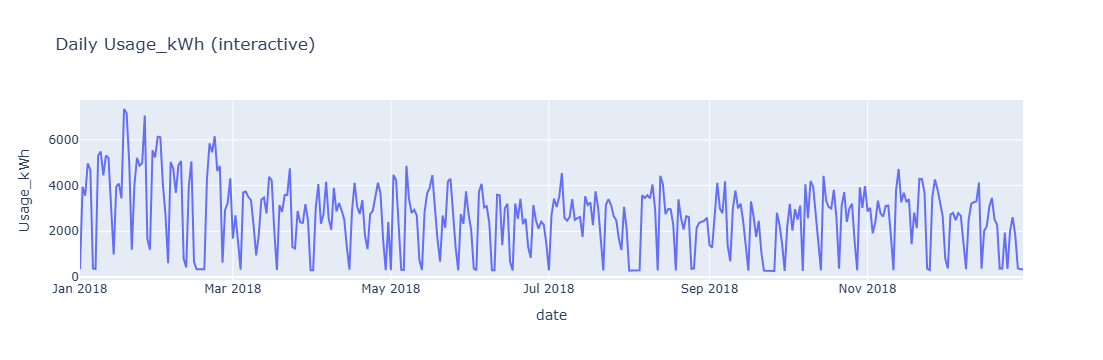

In [59]:
#Interactive plot
fig = px.line(df_daily, x='date', y='Usage_kWh', title='Daily Usage_kWh (interactive)')
fig.show()

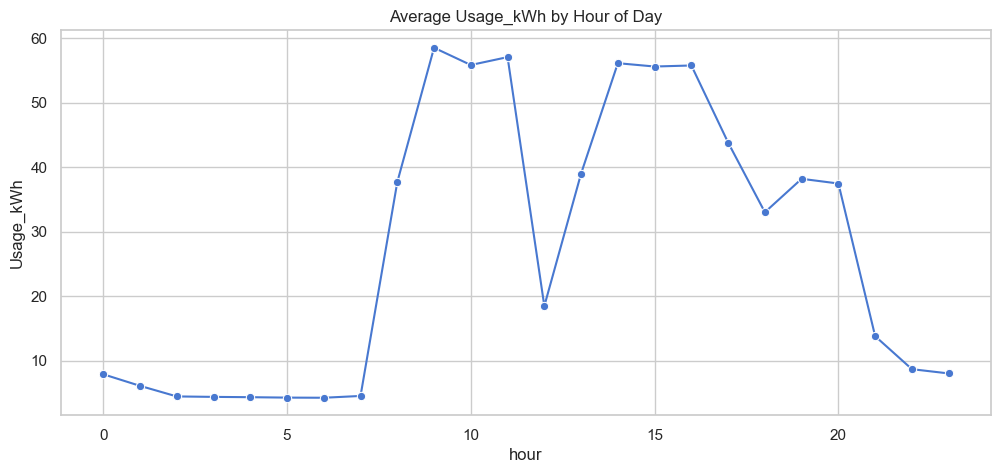

In [60]:
#Seasonal patterns by hour and weekday
plt.figure(figsize=(12,5))
sns.lineplot(data=df.groupby('hour')['Usage_kWh'].mean().reset_index(), x='hour', y='Usage_kWh', marker='o')
plt.title('Average Usage_kWh by Hour of Day')
plt.show()

This line plot illustrates the average electricity consumption (`Usage_kWh`) across each hour of the day. It reveals several important patterns in daily energy usage:

- **Low Usage During Early Morning**:  
  Electricity consumption is minimal between 00:00 and 07:00, indicating reduced industrial activity during these hours.

- **Sharp Morning Surge**:  
  Usage spikes rapidly starting at 08:00, peaking around 09:00–10:00. This reflects the start of daily operations and high energy demand during early production hours.

- **Midday Dip and Recovery**:  
  A noticeable drop occurs around 11:00, followed by a second rise between 12:00 and 16:00. This may correspond to shift changes, equipment cycles, or scheduled breaks.

- **Gradual Evening Decline**:  
  After 16:00, usage steadily decreases, reaching its lowest levels late at night. This suggests a tapering of activity toward the end of the workday.

---

**Conclusion**:  
This hourly pattern highlights the importance of time-based features in modeling electricity usage. Including `hour`, `NSM`, and cyclical encodings (`hour_sin`, `hour_cos`) can help capture these operational rhythms and improve model accuracy.

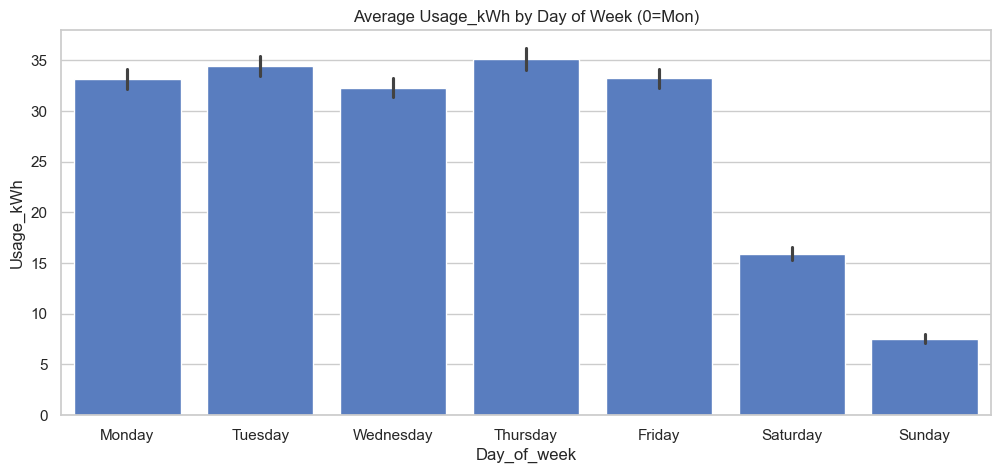

In [61]:
plt.figure(figsize=(12,5))
sns.barplot(data=df, x='Day_of_week', y='Usage_kWh')
plt.title('Average Usage_kWh by Day of Week (0=Mon)')
plt.show()

- **Higher Usage on Weekdays**:  
  Electricity consumption is consistently higher from Monday to Friday, with Thursday showing the peak average usage. This reflects standard industrial activity during the workweek.

- **Lower Usage on Weekends**:  
  Usage drops significantly on Saturday and reaches its lowest on Sunday, indicating reduced operations or downtime during weekends.

- **Operational Rhythm**:  
  The clear contrast between weekday and weekend usage suggests a structured production schedule, which can be leveraged for energy optimization and load balancing.

- **Error Bars Indicate Variability**:  
  The presence of error bars shows that daily usage can vary, especially on high-demand days, which may be influenced by production cycles or external factors.

---

**Conclusion**:  
This weekly pattern reinforces the importance of including calendar-based features like `day_of_week`, `is_weekend`, and `WeekStatus` in the modeling pipeline. It also highlights opportunities for energy-saving strategies during low-demand periods.

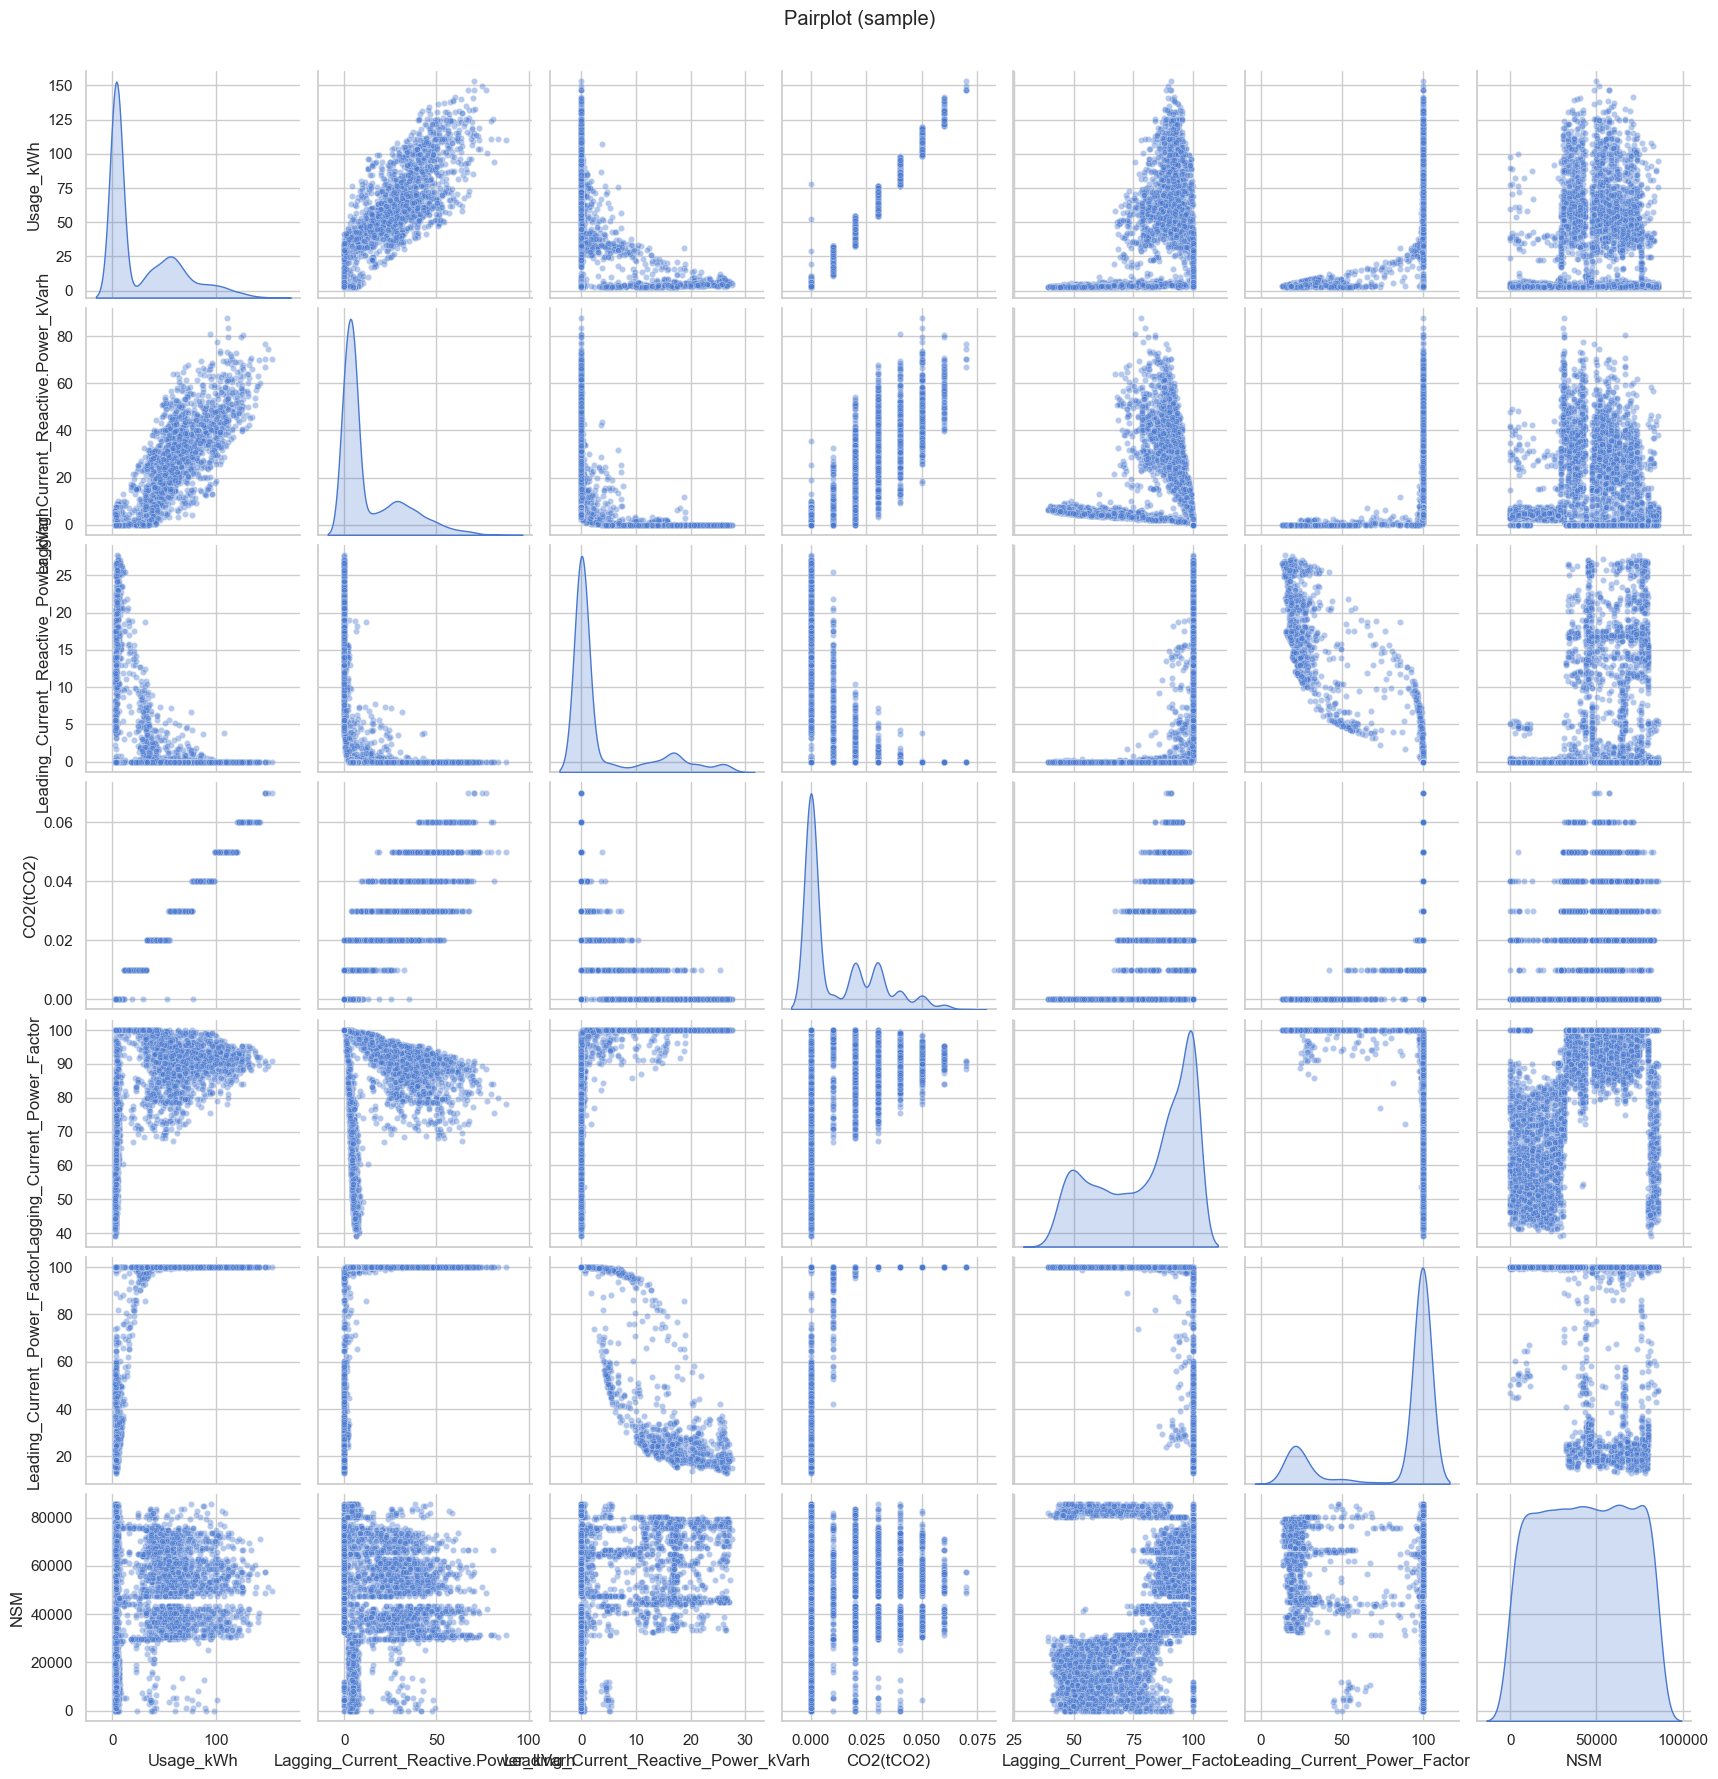

<Figure size 1400x1100 with 0 Axes>

In [62]:
#Pairwise relationships for numeric features (sample if large)
numeric_cols = ['Usage_kWh','Lagging_Current_Reactive.Power_kVarh','Leading_Current_Reactive_Power_kVarh',
                'CO2(tCO2)','Lagging_Current_Power_Factor','Leading_Current_Power_Factor','NSM']
sample = df[numeric_cols].sample(min(5000, len(df)), random_state=42)
sns.pairplot(sample, diag_kind='kde', plot_kws={'alpha':0.4, 's':20})
plt.suptitle('Pairplot (sample)', y=1.02)
plt.figure(figsize=(14,11))
plt.show()

- **Correlations**:  
  Several variables show linear or non-linear relationships with `Usage_kWh`, especially reactive power features. These correlations can guide feature selection and model design.

- **Distributions**:  
  The diagonal plots reveal the distribution of each variable. Some features (like `Usage_kWh` and reactive power) are right-skewed, suggesting the need for scaling or transformation.

- **Outliers**:  
  Scatter plots show the presence of outliers in multiple variables, which may affect model performance. Tree-based models like Random Forest are robust to these, while linear models may require preprocessing.

- **Feature Interactions**:  
  Certain variable pairs (e.g., reactive power vs. power factor) show structured patterns, indicating potential multicollinearity or domain-specific dependencies.

---

**Conclusion**:  
This pairplot is a valuable tool for exploratory data analysis, helping identify relationships, distributions, and anomalies. It supports informed decisions about feature engineering, scaling, and model selection.

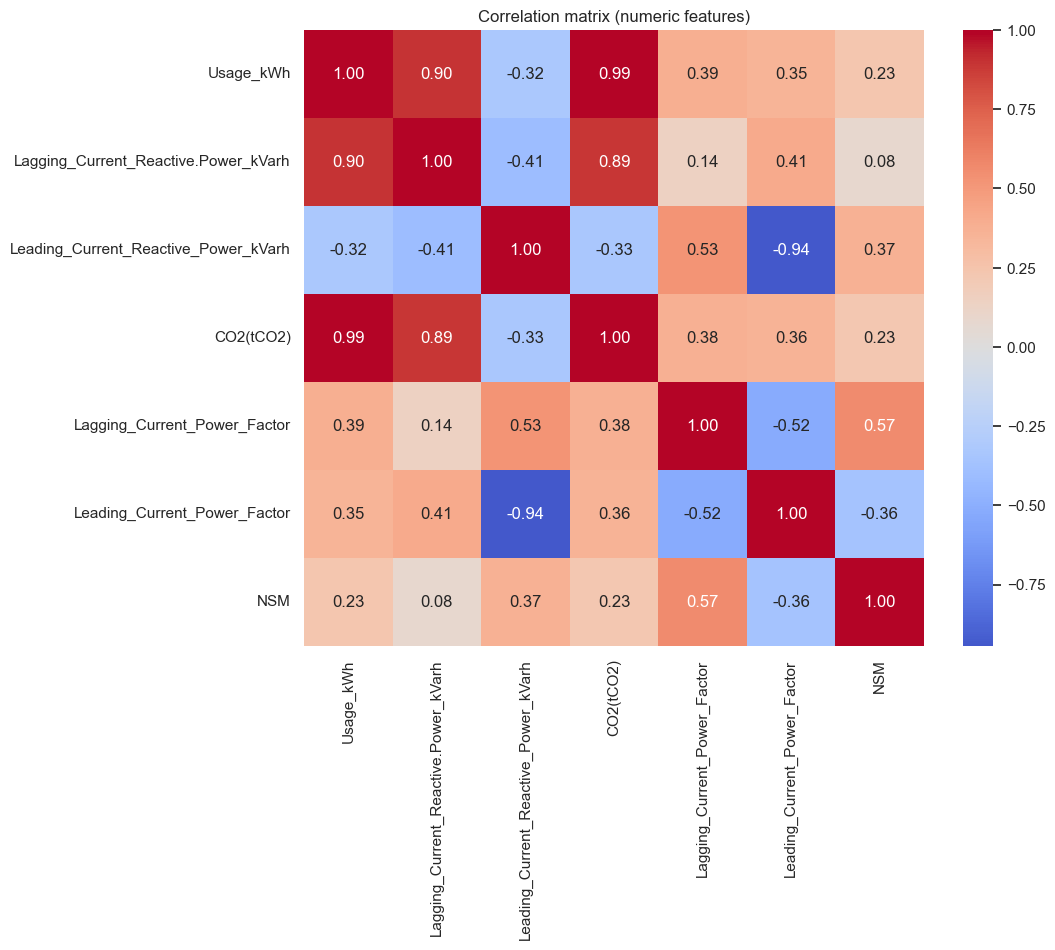

In [25]:
#Correlation heatmap
plt.figure(figsize=(10,8))
corr = df[numeric_cols].corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', center=0)
plt.title('Correlation matrix (numeric features)')
plt.show()

- **Strong Positive Correlations**:
  - `Usage_kWh` is highly correlated with `CO2(tCO2)` (0.99) and `Lagging_Current_Reactive.Power_kVarh` (0.90), indicating that higher energy usage is closely tied to reactive power and carbon emissions.
  - These features are strong predictors and should be prioritized in the regression model.

- **Strong Negative Correlation**:
  - `Leading_Current_Reactive_Power_kVarh` has a negative correlation with `Usage_kWh` (-0.32) and is strongly negatively correlated with `Leading_Current_Power_Factor` (-0.94), suggesting inverse relationships that may reflect power quality dynamics.

- **Moderate Correlations**:
  - `Lagging_Current_Power_Factor` and `NSM` show moderate correlations with other features, indicating some influence but less predictive strength.

- **Multicollinearity Alert**:
  - The high correlation between `Usage_kWh`, `CO2(tCO2)`, and `Lagging_Current_Reactive.Power_kVarh` suggests potential multicollinearity. Tree-based models like Random Forest and XGBoost can handle this well, but linear models may require regularization or feature selection.

---

**Conclusion**:  
This correlation matrix helps identify the most influential features for predicting electricity usage and highlights potential multicollinearity. It supports the use of ensemble models and guides feature selection for improved model performance.

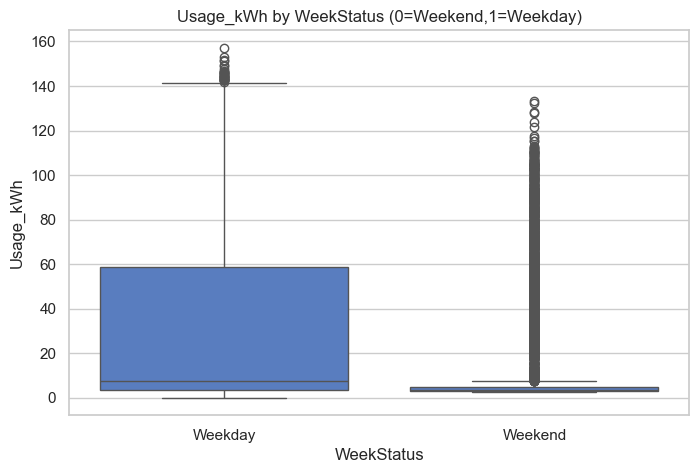

In [63]:
#Boxplots of Usage_kWh by categorical features (if present)
if 'WeekStatus' in df.columns:
    plt.figure(figsize=(8,5))
    sns.boxplot(x='WeekStatus', y='Usage_kWh', data=df)
    plt.title('Usage_kWh by WeekStatus (0=Weekend,1=Weekday)')
    plt.show()

- **Higher Usage on Weekdays**:  
  The median and interquartile range (IQR) are both higher for weekdays, indicating more intensive industrial activity during the workweek.

- **Lower and More Stable Usage on Weekends**:  
  Weekend usage is more concentrated, with a lower median and fewer extreme outliers. This suggests reduced operations or maintenance periods.

- **Greater Variability on Weekdays**:  
  The weekday boxplot shows a wider spread and more outliers, with values reaching up to ~150 kWh. This reflects dynamic production schedules and possibly peak demand events.

---

**Conclusion**:  
This comparison highlights the importance of including `WeekStatus` or `is_weekend` as a feature in the regression model. It also suggests opportunities for energy optimization during high-usage weekdays and load balancing across the week.

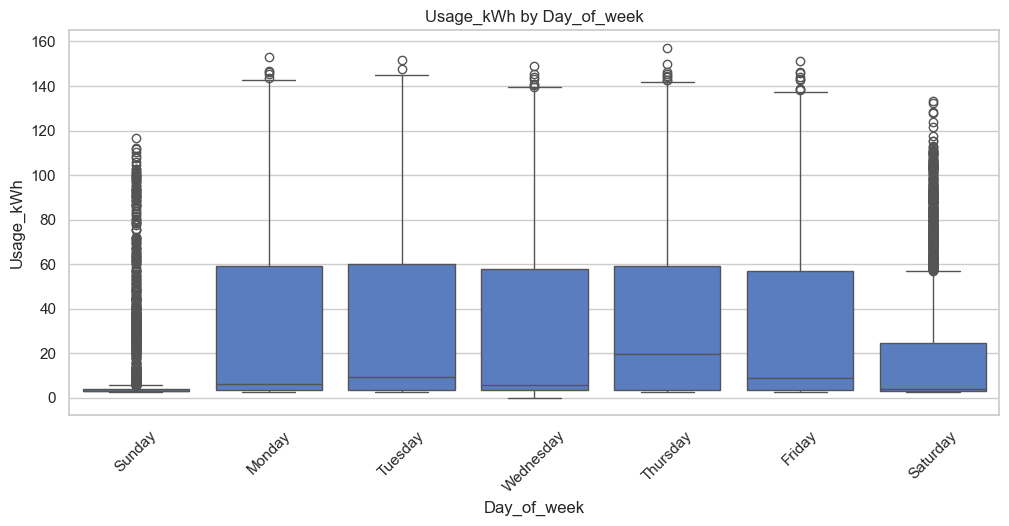

In [64]:
if 'Day_of_week' in df.columns:
    plt.figure(figsize=(12,5))
    order = ['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'] if df['Day_of_week'].dtype == object else None
    sns.boxplot(x='Day_of_week', y='Usage_kWh', data=df, order=order)
    plt.title('Usage_kWh by Day_of_week')
    plt.xticks(rotation=45)
    plt.show()

- **Consistent Usage on Weekdays**:  
  Monday through Friday show similar box heights and medians, indicating stable and predictable energy demand during the workweek.

- **Reduced Usage on Weekends**:  
  Saturday and Sunday display lower medians and narrower interquartile ranges, suggesting reduced industrial activity or partial shutdowns.

- **Presence of Outliers Across All Days**:  
  Each day includes outliers above the upper whisker, reflecting occasional spikes in usage. These may be due to special operations, equipment testing, or anomalies.

- **Operational Rhythm**:  
  The contrast between weekday and weekend usage supports the inclusion of `day_of_week` and `WeekStatus` as features in the regression model.

---

**Conclusion**:  
This visualization confirms that electricity usage follows a structured weekly pattern, with higher and more variable consumption on weekdays. Incorporating calendar-based features can improve model accuracy and help identify opportunities for energy optimization.

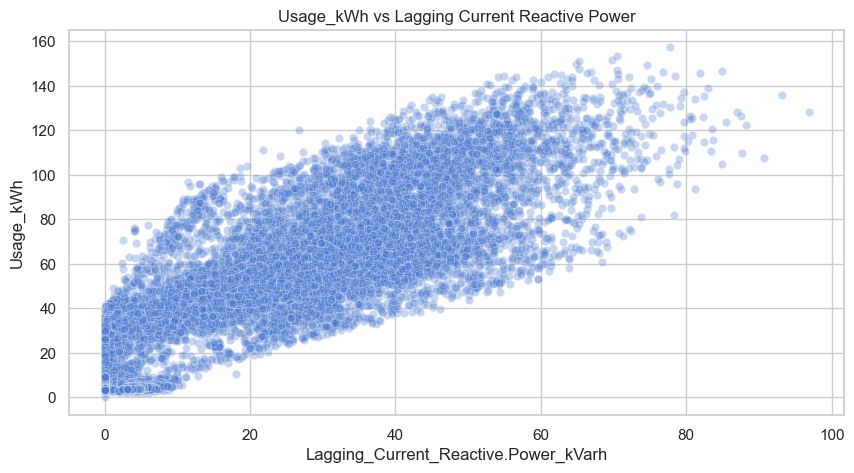

In [65]:
#Scatter plots to inspect relationships
plt.figure(figsize=(10,5))
sns.scatterplot(x='Lagging_Current_Reactive.Power_kVarh', y='Usage_kWh', data=df, alpha=0.3)
plt.title('Usage_kWh vs Lagging Current Reactive Power')
plt.show()

- **Strong Positive Correlation**:  
  As lagging reactive power increases, electricity usage also tends to rise. This indicates that reactive power is a strong predictor of total energy consumption.

- **Dense Clustering**:  
  Most data points are concentrated along a rising diagonal pattern, suggesting a consistent relationship across observations.

- **Physical Interpretation**:  
  In industrial settings, higher reactive power often reflects increased inductive load (e.g., motors, transformers), which contributes to higher overall energy usage.

- **Modeling Implication**:  
  This feature should be prioritized in regression models, especially tree-based algorithms that can capture non-linear dependencies.

---

**Conclusion**:  
Lagging current reactive power is a key driver of electricity usage in this dataset. Its strong correlation with `Usage_kWh` supports its inclusion as a core feature in predictive modeling pipelines.

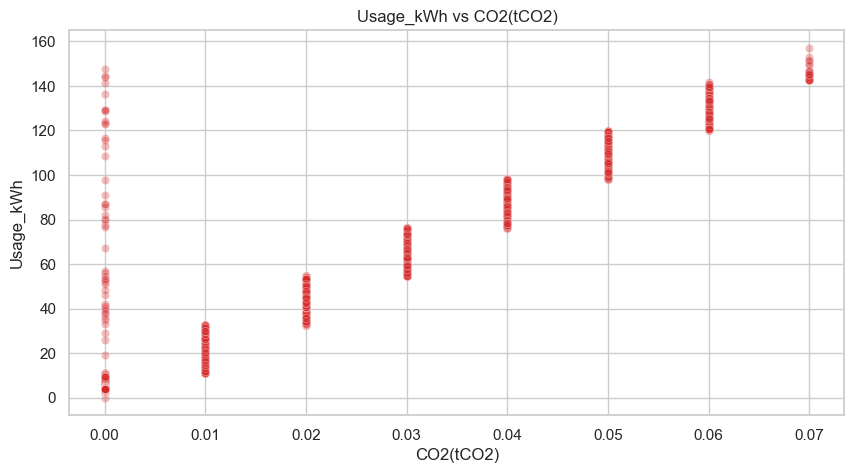

In [66]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='CO2(tCO2)', y='Usage_kWh', data=df, alpha=0.3, color='tab:red')
plt.title('Usage_kWh vs CO2(tCO2)')
plt.show()

- **Strong Positive Correlation**:  
  As electricity usage increases, CO₂ emissions also rise. This indicates a direct environmental impact of energy consumption in the steel industry.

- **Dense Linear Pattern**:  
  The data points form a tightly clustered upward trend, suggesting a consistent and proportional relationship between energy usage and emissions.

- **Predictive Value**:  
  CO₂ emissions serve as a strong predictor of electricity usage and vice versa. Including this feature in the regression model enhances both accuracy and interpretability.

- **Sustainability Implications**:  
  This relationship highlights the importance of monitoring and optimizing energy usage to reduce environmental impact. It also opens the door for future work involving carbon footprint modeling or energy efficiency strategies.

---

**Conclusion**:  
Electricity consumption and CO₂ emissions are tightly linked in this dataset. Incorporating emissions data into predictive models not only improves performance but also supports sustainability-driven decision-making.

In [67]:
#Prepare features and target
TARGET = 'Usage_kWh'

# Identify feature lists
# Numeric features (exclude target)
num_features = ['Lagging_Current_Reactive.Power_kVarh','Leading_Current_Reactive_Power_kVarh',
                'CO2(tCO2)','Lagging_Current_Power_Factor','Leading_Current_Power_Factor','NSM',
                'hour_sin','hour_cos','month','is_weekend']

# Categorical features
cat_features = []
if 'WeekStatus' in df.columns:
    cat_features.append('WeekStatus')
if 'Day_of_week' in df.columns:
    cat_features.append('Day_of_week')
if 'Load Type' in df.columns:
    cat_features.append('Load Type')

# Final X, y
X = df[num_features + cat_features].copy()
y = df[TARGET].copy()

X.shape, y.shape

((35040, 12), (35040,))

In [68]:
#Column transformer and pipeline
numeric_transformer = Pipeline(steps=[
    ('scaler', RobustScaler())  # robust to outliers
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, num_features),
    ('cat', categorical_transformer, cat_features)
], remainder='drop')

# Example pipeline for RandomForest
rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', RandomForestRegressor(n_estimators=200, random_state=42, n_jobs=-1))
])


In [69]:
#Time-aware split (use last 20% as test)
df_sorted = df.sort_values('date').reset_index(drop=True)
split_index = int(len(df_sorted) * 0.8)
train_idx = df_sorted.index[:split_index]
test_idx = df_sorted.index[split_index:]

X_train = X.loc[train_idx].reset_index(drop=True)
X_test = X.loc[test_idx].reset_index(drop=True)
y_train = y.loc[train_idx].reset_index(drop=True)
y_test = y.loc[test_idx].reset_index(drop=True)

print("Train size:", X_train.shape, "Test size:", X_test.shape)

Train size: (28032, 12) Test size: (7008, 12)


In [70]:
#Baseline linear regression
lr_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('lr', LinearRegression())
])
lr_pipeline.fit(X_train, y_train)
y_pred_lr = lr_pipeline.predict(X_test)

def regression_metrics(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)                       
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    return {'RMSE': rmse, 'MAE': mae, 'R2': r2}

metrics_lr = regression_metrics(y_test, y_pred_lr)
metrics_lr

{'RMSE': np.float64(3.6415833849190076),
 'MAE': 2.564269354340564,
 'R2': 0.9865259541442952}

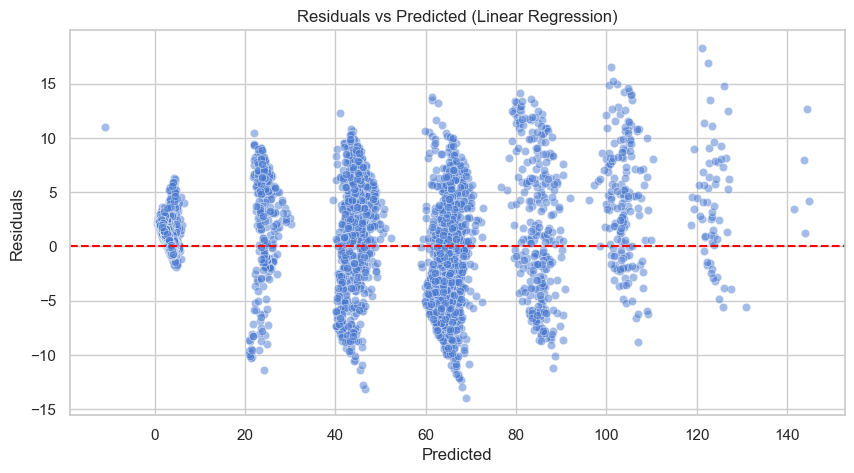

In [71]:
#Residual plot for linear model
residuals = y_test - y_pred_lr
plt.figure(figsize=(10,5))
sns.scatterplot(x=y_pred_lr, y=residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted (Linear Regression)')
plt.show()

- **Non-Random Residual Pattern**:  
  The residuals are not evenly scattered around the horizontal line at zero. This suggests that the model may be missing non-linear relationships in the data.

- **Signs of Heteroscedasticity**:  
  The spread of residuals increases with higher predicted values, indicating that the model's error variance is not constant. This violates one of the key assumptions of linear regression.

- **Underfitting Behavior**:  
  The structured pattern in residuals implies that the linear model may be too simplistic for capturing the complexity of the data. More flexible models like Random Forest or XGBoost may perform better.

- **No Severe Outliers in Residuals**:  
  While the pattern is structured, there are no extreme residuals far from the zero line, which suggests that the model is not producing wildly inaccurate predictions.

---

**Conclusion**:  
This residual plot highlights limitations in the Linear Regression model, particularly its inability to capture non-linear patterns and its heteroscedastic error structure. Ensemble models are better suited for this dataset and show improved performance in comparison.

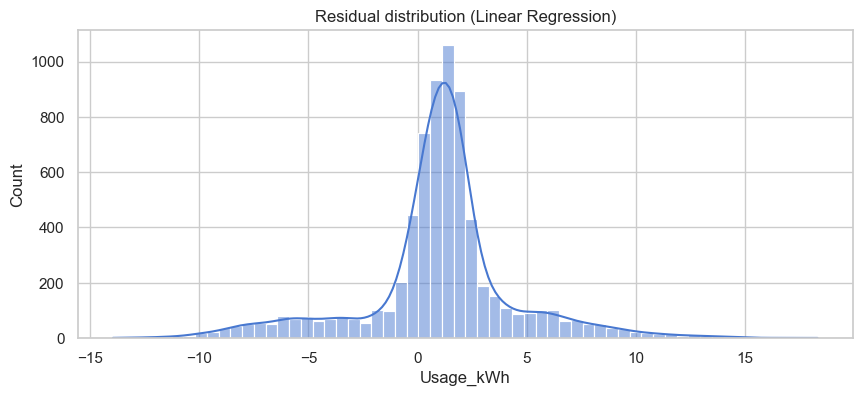

In [72]:
# Distribution of residuals
plt.figure(figsize=(10,4))
sns.histplot(residuals, bins=60, kde=True)
plt.title('Residual distribution (Linear Regression)')
plt.show()

- **Centered Around Zero**:  
  The residuals are symmetrically distributed around zero, indicating that the model does not consistently overpredict or underpredict.

- **Roughly Normal Shape**:  
  The bell-shaped curve suggests that the residuals follow a roughly normal distribution, which aligns with one of the assumptions of linear regression.

- **No Extreme Skewness**:  
  The distribution does not show heavy skewness or long tails, implying that most predictions are reasonably accurate and extreme errors are rare.

- **Model Diagnostics**:  
  A normal residual distribution supports the validity of the model’s inference. However, it should be paired with residual-vs-predicted plots to check for heteroscedasticity or non-linearity.

---

**Conclusion**:  
This residual distribution confirms that the Linear Regression model produces errors that are symmetrically and fairly normally distributed. While this supports the model’s assumptions, further diagnostics are needed to assess its ability to capture complex patterns.

In [73]:
#Fit Random Forest
rf_pipeline.fit(X_train, y_train)
y_pred_rf = rf_pipeline.predict(X_test)
metrics_rf = regression_metrics(y_test, y_pred_rf)
metrics_rf

{'RMSE': np.float64(1.2520269172050145),
 'MAE': 0.5091687999429222,
 'R2': 0.9984072601910656}

In [74]:
#Fit XGBoost (with default params)
xgb_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('xgb', XGBRegressor(n_estimators=300, learning_rate=0.05, random_state=42, n_jobs=-1))
])
xgb_pipeline.fit(X_train, y_train)
y_pred_xgb = xgb_pipeline.predict(X_test)
metrics_xgb = regression_metrics(y_test, y_pred_xgb)
metrics_xgb

{'RMSE': np.float64(1.1073986726991376),
 'MAE': 0.6377166997175239,
 'R2': 0.998753978601934}

In [75]:
#Compare metrics
results = pd.DataFrame([metrics_lr, metrics_rf, metrics_xgb], index=['LinearRegression','RandomForest','XGBoost'])
display(results)

,RMSE,MAE,R2
LinearRegression,3.641583,2.564269,0.986526
RandomForest,1.252027,0.509169,0.998407
XGBoost,1.107399,0.637717,0.998754


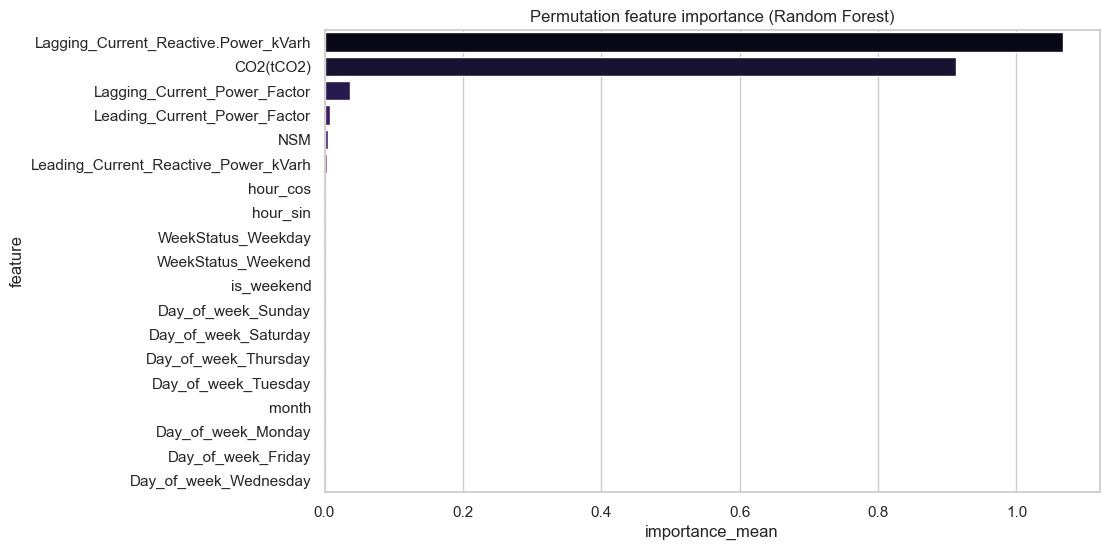

In [76]:
#Permutation importance for Random Forest (post-preprocessing)
# Need to transform X_test through preprocessor to get numeric array
X_test_transformed = rf_pipeline.named_steps['preprocessor'].transform(X_test)
rf_model = rf_pipeline.named_steps['model']
perm = permutation_importance(rf_model, X_test_transformed, y_test, n_repeats=10, random_state=42, n_jobs=-1)

# Map back feature names (including one-hot)
# Build feature names list
num_names = num_features
cat_names = []
if cat_features:
    ohe = rf_pipeline.named_steps['preprocessor'].named_transformers_['cat'].named_steps['onehot']
    cat_names = list(ohe.get_feature_names_out(cat_features))
feature_names = num_names + cat_names

fi = pd.DataFrame({'feature': feature_names, 'importance_mean': perm.importances_mean})
fi = fi.sort_values('importance_mean', ascending=False).reset_index(drop=True)
plt.figure(figsize=(10,6))
sns.barplot(data=fi.head(20), x='importance_mean', y='feature', hue='feature', palette='magma',legend=False)
plt.title('Permutation feature importance (Random Forest)')
plt.show()

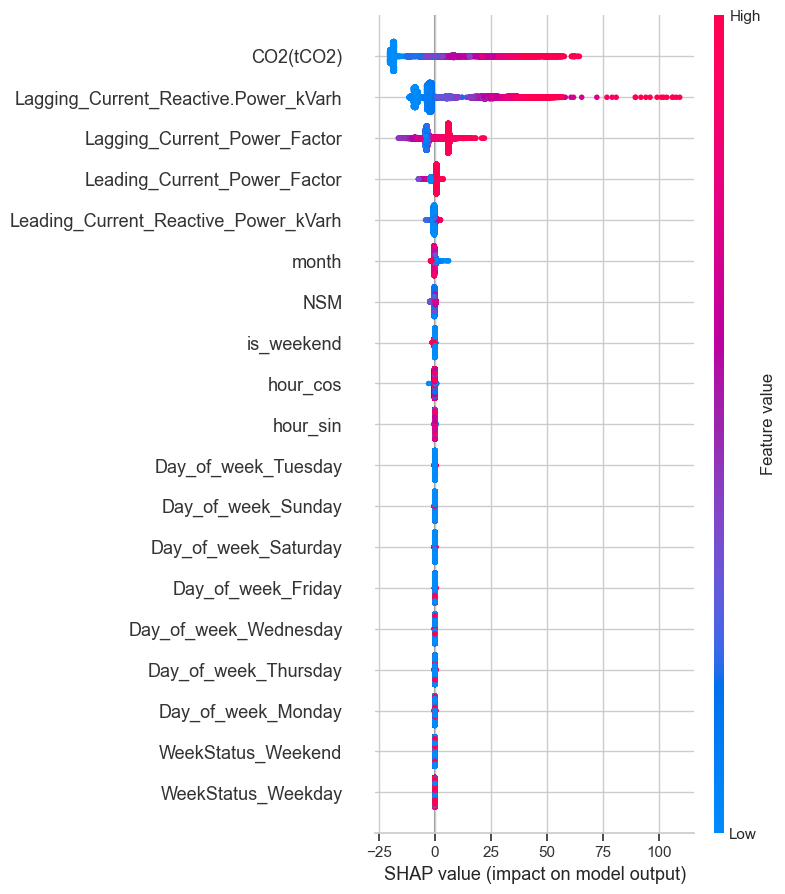

In [77]:
#SHAP for XGBoost (global + local explanations)
# Transform training data for SHAP
X_train_trans = xgb_pipeline.named_steps['preprocessor'].transform(X_train)
xgb_model = xgb_pipeline.named_steps['xgb']

# Use TreeExplainer for XGBoost
explainer = shap.Explainer(xgb_model)
shap_values = explainer(X_train_trans)

# Summary plot (global)
shap.summary_plot(shap_values, features=X_train_trans, feature_names=feature_names, show=True)

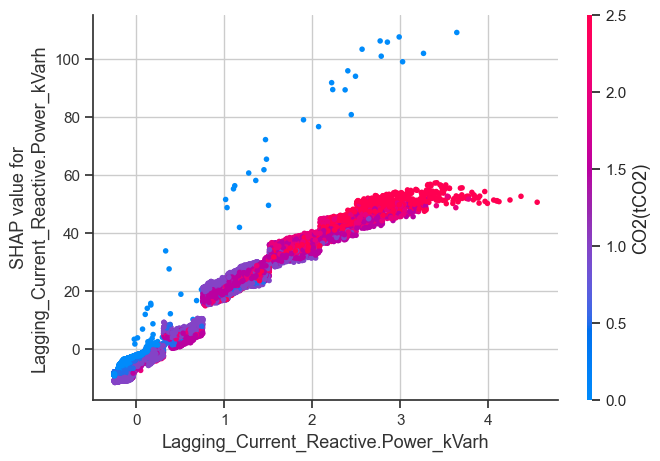

In [78]:
#SHAP dependence plot for top feature
top_feat = fi.loc[0, 'feature']
# find index of top_feat in feature_names
idx = feature_names.index(top_feat)
shap.dependence_plot(idx, shap_values.values, X_train_trans, feature_names=feature_names, show=True)

In [79]:
#Randomized search for RandomForest (time series CV)
param_dist = {
    'model__n_estimators': [100, 200, 400],
    'model__max_depth': [6, 10, 20, None],
    'model__min_samples_split': [2, 5, 10],
    'model__min_samples_leaf': [1, 2, 4]
}

# Wrap pipeline for RandomizedSearchCV
rf_pipe_for_search = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', RandomForestRegressor(random_state=42, n_jobs=-1))
])

tscv = TimeSeriesSplit(n_splits=5)
search = RandomizedSearchCV(rf_pipe_for_search, param_distributions=param_dist, n_iter=20,
                            cv=tscv, scoring='neg_root_mean_squared_error', n_jobs=-1, random_state=42, verbose=1)
search.fit(X_train, y_train)
print("Best params:", search.best_params_)
best_rf = search.best_estimator_
y_pred_best_rf = best_rf.predict(X_test)
regression_metrics(y_test, y_pred_best_rf)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best params: {'model__n_estimators': 100, 'model__min_samples_split': 2, 'model__min_samples_leaf': 1, 'model__max_depth': None}


{'RMSE': np.float64(1.267071436031469),
 'MAE': 0.5168287100456619,
 'R2': 0.9983687530807254}

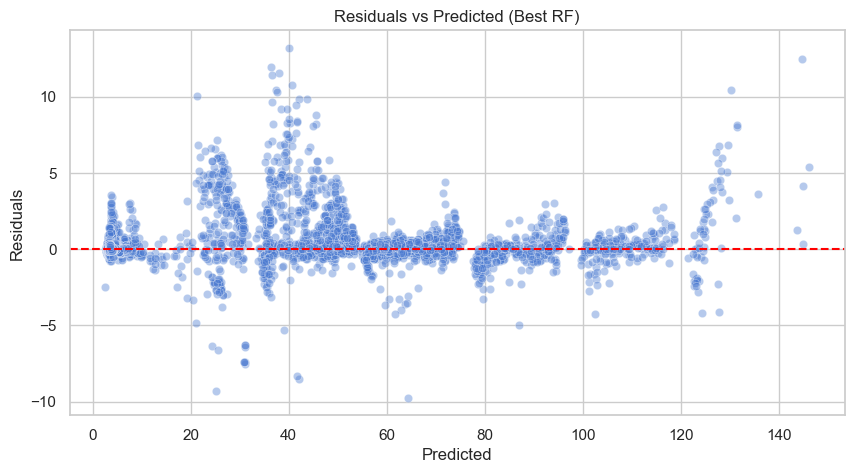

In [80]:
#Residuals for best RF
resid_best = y_test - y_pred_best_rf
plt.figure(figsize=(10,5))
sns.scatterplot(x=y_pred_best_rf, y=resid_best, alpha=0.4)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted (Best RF)')
plt.show()

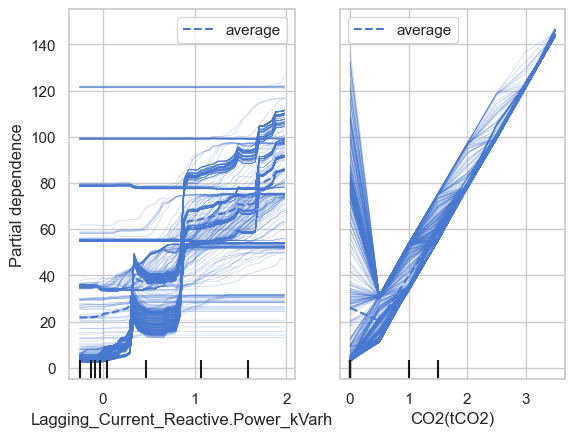

In [81]:
# Partial dependence for top 2 numeric features
top2 = fi['feature'].tolist()[:2]
# Map top2 to indices in feature_names
top2_idx = [feature_names.index(f) for f in top2]
PartialDependenceDisplay.from_estimator(best_rf.named_steps['model'], X_test_transformed, features=top2_idx, feature_names=feature_names, kind='both', grid_resolution=50)
plt.show()

<Figure size 1000x600 with 0 Axes>

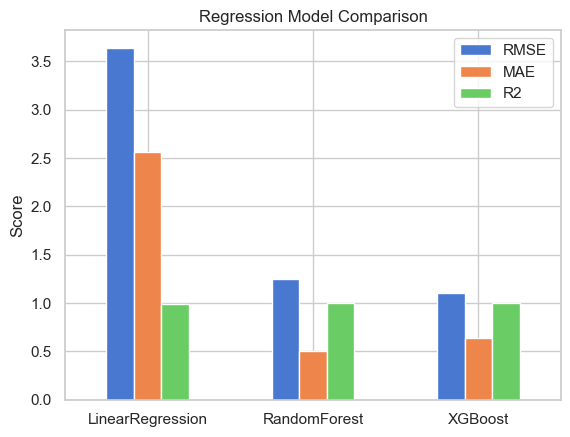

In [82]:
plt.figure(figsize=(10,6))
results[['RMSE','MAE','R2']].plot(kind='bar')
plt.title("Regression Model Comparison")
plt.ylabel("Score")
plt.xticks(rotation=0)
plt.legend(loc='best')
plt.show()

In [83]:
import joblib

# Save Random Forest pipeline
joblib.dump(rf_pipeline, "random_forest_model.pkl")

# Save Linear Regression pipeline
joblib.dump(lr_pipeline, "linear_regression_model.pkl")

# Save XGBoost model
joblib.dump(xgb_model, "xgboost_model.pkl")

['xgboost_model.pkl']

In [84]:
joblib.dump(rf_pipeline, "model_pipeline.joblib")
print("Saved: model_pipeline.joblib")

Saved: model_pipeline.joblib
